## Homework 2

Using Python for Excel type tasks

## Import some libraries

In [62]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import commonly used libraries and magic command for inline plotting

In [63]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [64]:
%matplotlib inline

Now I am going to import 'Model' and 'get_sim_results_df' from the provided whatif.py file

In [65]:
from whatif import Model
from whatif import get_sim_results_df

# Analysis 1 – Basic Break Even Analysis

The owner of a relatively small business is trying to determine the breakeven level of sales of the company’s single product.  The fixed cost of manufacturing this product each month is 60,000.00.  The variable cost of producing this product is 90 per unit.  The current selling price is 120.  Using historical data on selling price and monthly demand, the owner fit the following function relating demand and selling price:

Selling Price Function (SPF)
D=10,000,000S^(-1.8)

where D is the monthly demand for the product and S is the selling price.  The form of this function is called a power function. So, if we increase our selling price, we believe demand will decrease. Similarly, a decrease in selling price suggests an increase in demand. Let’s call this equation the Selling Price Function (or SPF, for short).



## Base Model
Create a Python based model to that relates profit to the inputs. It must be an object oriented model. Here's the start of our class definition code:

Based on the initial information given above, our variables can be defined as follows:

In [67]:
# Set the base inputs
fixed_cost = 60000
var_cost = 90
selling_price = 120
spf_scale = 10000000
spf_exponent = -1.8

Here's the start of our class definition code:

In [68]:
class SingleProductSPF(Model):
    def __init__(self, fixed_cost, var_cost, selling_price,
                spf_scale, spf_exponent):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_scale = spf_scale
        self.spf_exponent = spf_exponent
        

In [69]:
# Create a new SingleProductSPFModel object
model_1 = SingleProductSPF(fixed_cost, var_cost, selling_price, spf_scale, spf_exponent)

Let's try printing out one of the model properties to make sure we are on track...

In [70]:
print(model_1.fixed_cost)

60000


So far, so good.  Now I am going to add some methods to my model that compute profit and demand

In [71]:
class SingleProductSPF():
    def __init__(self, fixed_cost, var_cost, selling_price,
                spf_scale, spf_exponent):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_scale = spf_scale
        self.spf_exponent = spf_exponent
        
    def demand(self):
        """Compute demand"""
        return self.spf_scale * (self.selling_price ** self.spf_exponent)
    
    def revenue(self):
        """Compute revenue"""
        return self.demand() * self.selling_price
    
    def costs(self):
        """Compute total of fixed and variable costs"""
        return (self.demand() * self.var_cost) + self.fixed_cost   
    
    def profit(self):
        """Compute profit"""
        return self.revenue() - self.costs()
    
    def __str__(self):
        """
        String representation of SingleProductSPF's inputs
        """
        return str(vars(self))

        

I'm going to create a new object instance based on the updated class definition.

In [72]:
model_2 = SingleProductSPF(fixed_cost, var_cost, selling_price, spf_scale, spf_exponent)

In [73]:
print(model_2.demand())
print(model_2.profit())

1809.146586595383
-5725.602402138524


Ok, so far, so good.  Although I have to admit I was a little stumped by needing those ()'s for the methods and not for the properties.

We can also remind ourself of the properties used with the following:

In [74]:
print(model_2)

{'fixed_cost': 60000, 'var_cost': 90, 'selling_price': 120, 'spf_scale': 10000000, 'spf_exponent': -1.8}


## 1-Way Data Table
Create a one-way data table using our data_table function to show how profit and demand are related to selling price.

Profit and demand are the outputs and selling price is the input. Let price range from 90 to 190 in steps of 10.

In [76]:
# Set property equal to an array
model_2.selling_price = np.arange(90, 191, 10)
model_2.selling_price

array([ 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190])

We can compute an array of profits...

In [79]:
model_2.profit()

array([-60000.        , -34881.1356849 , -17682.19213811,  -5725.60240214,
         2655.89776817,   8539.28035168,  12641.86473138,  15453.96586116,
        17318.23446585,  18478.73612485,  19112.2102885 ])

Now I will plot the relationship between profit and demand using seaborn

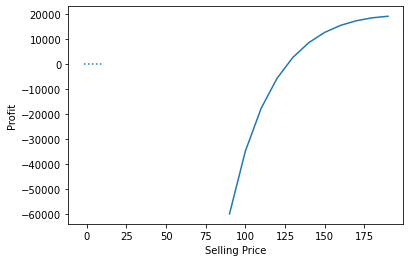

In [82]:
x = model_2.selling_price
y = model_2.profit()
plt.plot(x, y)
plt.xlabel('Selling Price')
plt.ylabel('Profit')
plt.hlines(0, left_bracket, right_bracket, linestyles='dotted')
plt.show()